# Methoden en Technieken -- Blok 1

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- A2: Je stelt voor een AI-oplossing juridische, ethische, organisatorische, **functionele en
technische requirements** op.
- B1: Je **verkent en prepareert een dataset voor het trainen en testen van een AI-model** en
kan de voor- en nadelen van het gebruik van een bestaande dataset onderbouwen, rekening
houdend met technische en ethische randvoorwaarden.
- B2: Je **stelt op basis van requirements en data een geschikte architectuur voor een AI-
oplossing op en selecteert daarvoor passende AI-technieken gebruik makend van bijvoorbeeld
machine learning, deep learning**, kennisrepresentatie, computer vision en natural language
processing.
- B3: Je **ontwikkelt een nieuw** of voorgetraind **AI-model** volgens een iteratief en systematisch
proces.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria die in het vakgebied erkend worden** zoals robustness, **performance**, scalability,
explainability, **model complexity** en resource demand.

Dit is een individuele opdracht. Het is toegestaan met elkaar de opdracht te bespreken, maar iedereen schrijft zijn eigen code en antwoorden. Mocht je code van het internet hebben overgenomen/aangepast, vermeld dan de bron in het commentaar. Het gebruik van generatieve AI (Chat-GPT, etc...) is *alleen* toegestaan bij de voorbereiding op de opdracht. Denk hierbj aan activiteiten zoals brainstormen, of het maken van een plan. Het is niet toegestaan code of tekst van generative AI over te nemen. (Level 2 van de AI Assessment Scale)


Dit volgende code leest de data in, het bestand **Visegrad2020.csv** is samen met deze opdracht te vinden op DLO.

## Imports

In [1]:
import numpy as np
from scipy import stats

# Data manpilations and visualizing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Imbalanced learn imports
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
data = pd.read_csv('./data/Visegrad2020.csv', index_col=0)

In deze opdracht ga je een model maken om de sector (kolom $S$, 6 klassen) te voorspellen a.d.h.v. de verklarende variabelen $X_1$ t/m $X_{82}$. Doel is hier niet om een interpreteerbaar model te maken, maar mocht je geïnteresseerd zijn in de herkomst van de data en de betekenis van de variabelen dan is dit te vinden op [https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2](https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2).

Het doel van deze opdracht is niet zo zeer om een zo goed mogelijk model op te leveren, maar te laten zien dat je al je keuzes in de modellering en evaluatie kan toelichten, verantwoorden, en correct kan toepassen.

### De opdracht

#### Deel A

Verken de data, en voer eventuele datapreparatie uit, leg kort uit wat je opvalt.

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
ID,,,,,,,,,,,,,,,,,,,,,
73,0.01,0.71,0.08,1.13,0.11,0.02,0.42,1.66,0.29,0.02,...,0.96,0.98,1.33,2.02,0.84,0.97,0.92,-0.10,0.13,1
139,0.07,0.63,0.18,1.32,0.08,0.10,0.60,3.09,0.37,0.10,...,1.31,1.44,1.47,5.64,3.32,1.27,1.36,5.19,-0.50,1
175,0.06,0.52,0.05,1.14,0.05,0.08,0.92,1.80,0.48,0.11,...,0.92,0.82,6.30,-778.70,0.97,0.88,0.73,0.80,-0.58,1
290,0.22,0.30,0.41,2.98,0.22,0.29,2.26,2.28,0.68,0.29,...,1.08,1.22,0.86,1.63,1.71,0.97,1.09,-0.75,-2.44,1
21,0.04,0.66,0.21,1.36,0.05,0.07,0.51,5.88,0.34,0.06,...,1.16,1.07,0.71,4.27,0.70,1.10,1.14,-3.17,52.03,2


<div style="color: #90EE90">

So the first look is that the data is all numbers but without meaningful labels so I will check the data source that was given above to better understand what I am looking at.

<br>

<h2>Data set origin and meaning </h2>

After checking the data set origin I can see that the set was created based on a national science fun from poland, it contains data about companies of the visegrad group which is a group of companies of from Czech Republic, Hungary, Poland, Slovakia. 

The target feature for this assignment is the feature S (Sector) which is a categorical feature where the number represents a sector. According ot the data source this value does not have missing values.

The X1 t/m X82 are all continous float values that primarily describe financial attributes of the company such as earnings, stocks, cash flows and also some things like inventory.

According to the data source all features except for the target feature S and X82 have missing values but it's good to double check this.

The data source also lists that the associated tasks are classification and clustering and that the data is not considered sensitive in any way which is nice.

<br>

# First look at data

</div>

In [4]:
print(data.dtypes.value_counts())
print("dataset shape:", data.shape)
print("non numeric values:", data.select_dtypes(exclude=['number']).columns.tolist())
print("null values:", data.isnull().sum().sum())

print("zero values:", (data == 0).sum().sum())

print(f"Missing value percentage: {((data == 0).sum().sum() / (data.shape[0] * data.shape[1])) * 100:.2f}%")

float64    82
int64       1
Name: count, dtype: int64
dataset shape: (133, 83)
non numeric values: []
null values: 0
zero values: 1265
Missing value percentage: 11.46%


<div style="color: #90EE90">

So the data source mentioned missing values, so I checked those. And the missing values seem to be values that are 0. This makes sense for most features since it doesn't make sense that things like profit or stocks would be truly 0. There are some features like EBIT (n)/EBIT (n−1) I don't fully understand so It's good to keep in mind that some values might be capable of truly being 0 without being missing. 

All the input features are floats and the target is an int so that helps and no null values exist. The data set is also pretty small being 133 rows (samples) and 83 columns (features) which is pretty high.

<br>

## Indepth look at Missing values

</div>

In [5]:
print("zeros per feature:")
# print((data == 0).sum(axis=0))

print(f"average zeros per feature: {(data == 0).sum(axis=0).mean():.2f}")

print("\n")

print("Features with most missing values:")
print((data == 0).sum(axis=0).sort_values(ascending=False).head(10))


zeros per feature:
average zeros per feature: 15.24


Features with most missing values:
X62    129
X64    105
X65     94
X63     84
X29     54
X33     53
X53     18
X80     15
X79     14
X82     14
dtype: int64


In [6]:
print("zeros per sample:")
# print((data == 0).sum(axis=1))

print(f"average zeros per sample: {(data == 0).sum(axis=1).mean():.2f}")

print("\n")

print("Samples with most missing values:")
print((data == 0).sum(axis=1).sort_values(ascending=False).head(10))


zeros per sample:
average zeros per sample: 9.51


Samples with most missing values:
ID
150    73
369    73
407    73
449    73
7      73
310    73
352    73
203    73
76     18
372    16
dtype: int64


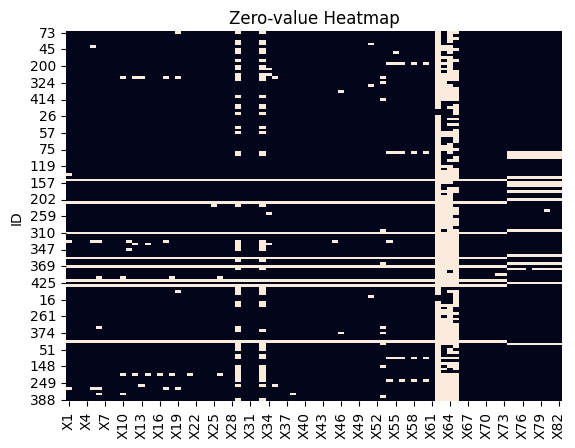

In [7]:
sns.heatmap((data.drop("S", axis=1) == 0), cbar=False)
plt.title("Zero-value Heatmap")
plt.show()

<div style="color: #90EE90">

There's a lot of missing values, almost 12% of values are missing further more when looking at specific features the average missing values per feature is around 15, but there's a few features like X62, x64, x65, x63 that have a lot of them and might be better left out when training. When looking at the rows there's also 8 samples that are missing almost all of their features. 

## Target feature balance

<div>

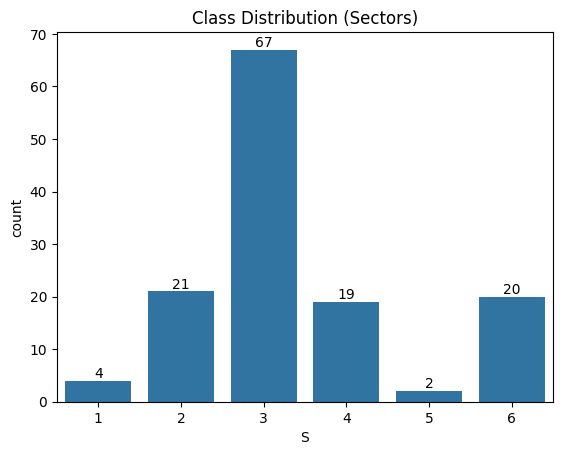

In [8]:
data['S'].value_counts(normalize=True) * 100

# Create the countplot
ax = sns.countplot(x="S", data=data)
plt.title("Class Distribution (Sectors)")

# Add the exact value above the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

<div style="color: #90EE90">

Another big problem that is quickly found is that there's a huge imbalance in the distribution of the samples per target feature. Sector 3 has half of the examples, while sector 2, 6 and 4 all share 15% of the samples. Sector 1 and 5 only have 3 and 1.5% of the samples respectively which is difficult.

With the amount of samples removing any data would probably have a negative impact, but if the model overfits on the biggest sector and the small ones need help it could help to undersample the main sector by removing the features with lots of missing data.

- [Learning from imbalanced Data](https://ieeexplore.ieee.org/document/5128907)

</div>

In [9]:

# samples_with_73_missing = (data == 0).sum(axis=1) == 73
# sector_3_with_many_missing = data[(data['S'] == 3) & samples_with_73_missing]

# print(f"Removing {len(sector_3_with_many_missing)} samples from sector 3 with 73 missing values")
# print(f"Keeping sector 5 samples intact (even with missing values)")

# data = data.drop(sector_3_with_many_missing.index)

# print(f"New dataset shape: {data.shape}")
# print(f"Updated class distribution:")
# print(data['S'].value_counts().sort_index())

<div style="color: #90EE90">

After I already trained my model and evaluated, I tested removing the rows with missing data to see what would happen. This had a really big negative impact on the performance because of the small amount of data

</div>

<div style="color: #90EE90">

## Checking correlations

Now let's see if any of the values are very closely related, I expect a lot of them might be because some monetary values might be directly related

</div>

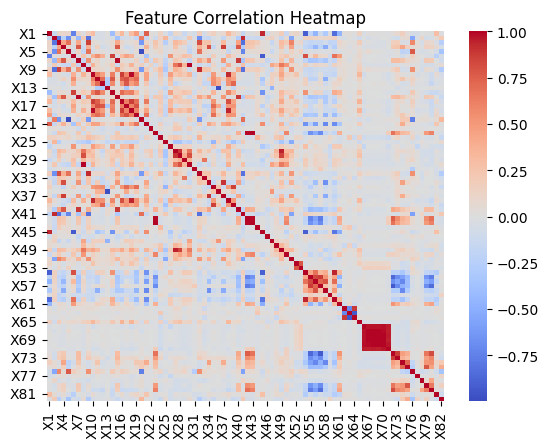

In [10]:
corr = data.drop("S", axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
# Get top 25 correlations (excluding self-correlations)

# Create upper triangle mask (excluding diagonal) this makes it so we don't count self-correlations or duplicate pairs. In the visual this means it shows only everything above the diagonal red line
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_pairs = corr.where(mask).stack().sort_values(key=abs, ascending=False)

print("Top 25 highest correlations:")
for i, (pair, corr_val) in enumerate(corr_pairs.head(25).items()):
    print(f"{i+1:2d}. {pair[0]} <-> {pair[1]}: {corr_val:.3f}")


Top 25 highest correlations:
 1. X23 <-> X43: 1.000
 2. X8 <-> X30: 0.999
 3. X68 <-> X69: 0.999
 4. X68 <-> X70: 0.997
 5. X5 <-> X20: -0.997
 6. X67 <-> X69: 0.997
 7. X69 <-> X70: 0.996
 8. X67 <-> X68: 0.995
 9. X23 <-> X42: 0.991
10. X42 <-> X43: 0.991
11. X67 <-> X70: 0.989
12. X7 <-> X15: 0.989
13. X10 <-> X18: 0.987
14. X13 <-> X36: -0.986
15. X66 <-> X70: 0.982
16. X66 <-> X68: 0.974
17. X66 <-> X69: 0.974
18. X66 <-> X67: 0.969
19. X70 <-> X71: 0.961
20. X66 <-> X71: 0.958
21. X68 <-> X71: 0.954
22. X69 <-> X71: 0.953
23. X63 <-> X64: -0.947
24. X67 <-> X71: 0.946
25. X27 <-> X49: 0.945


<div style="color: #90EE90">

As expected there are a bunch of features like for example X71 which has a very strong correlation with 5 other features. For this reason it might be good to use some dimension reducion like PCA to try and bring the dimension down and make the model easier to understand and prevent it from essentially training on the same feature multiple times and losing value from features that don't have high correlation with others which might still have valuable information.

## Visualize the data

So since there's 83 features and visualizing all of it wouldn't be useful and considering the data high very high correlations. It would be good to have some vizualisation like a plot with the distribution, scatter plot or a boxplot.

</div>

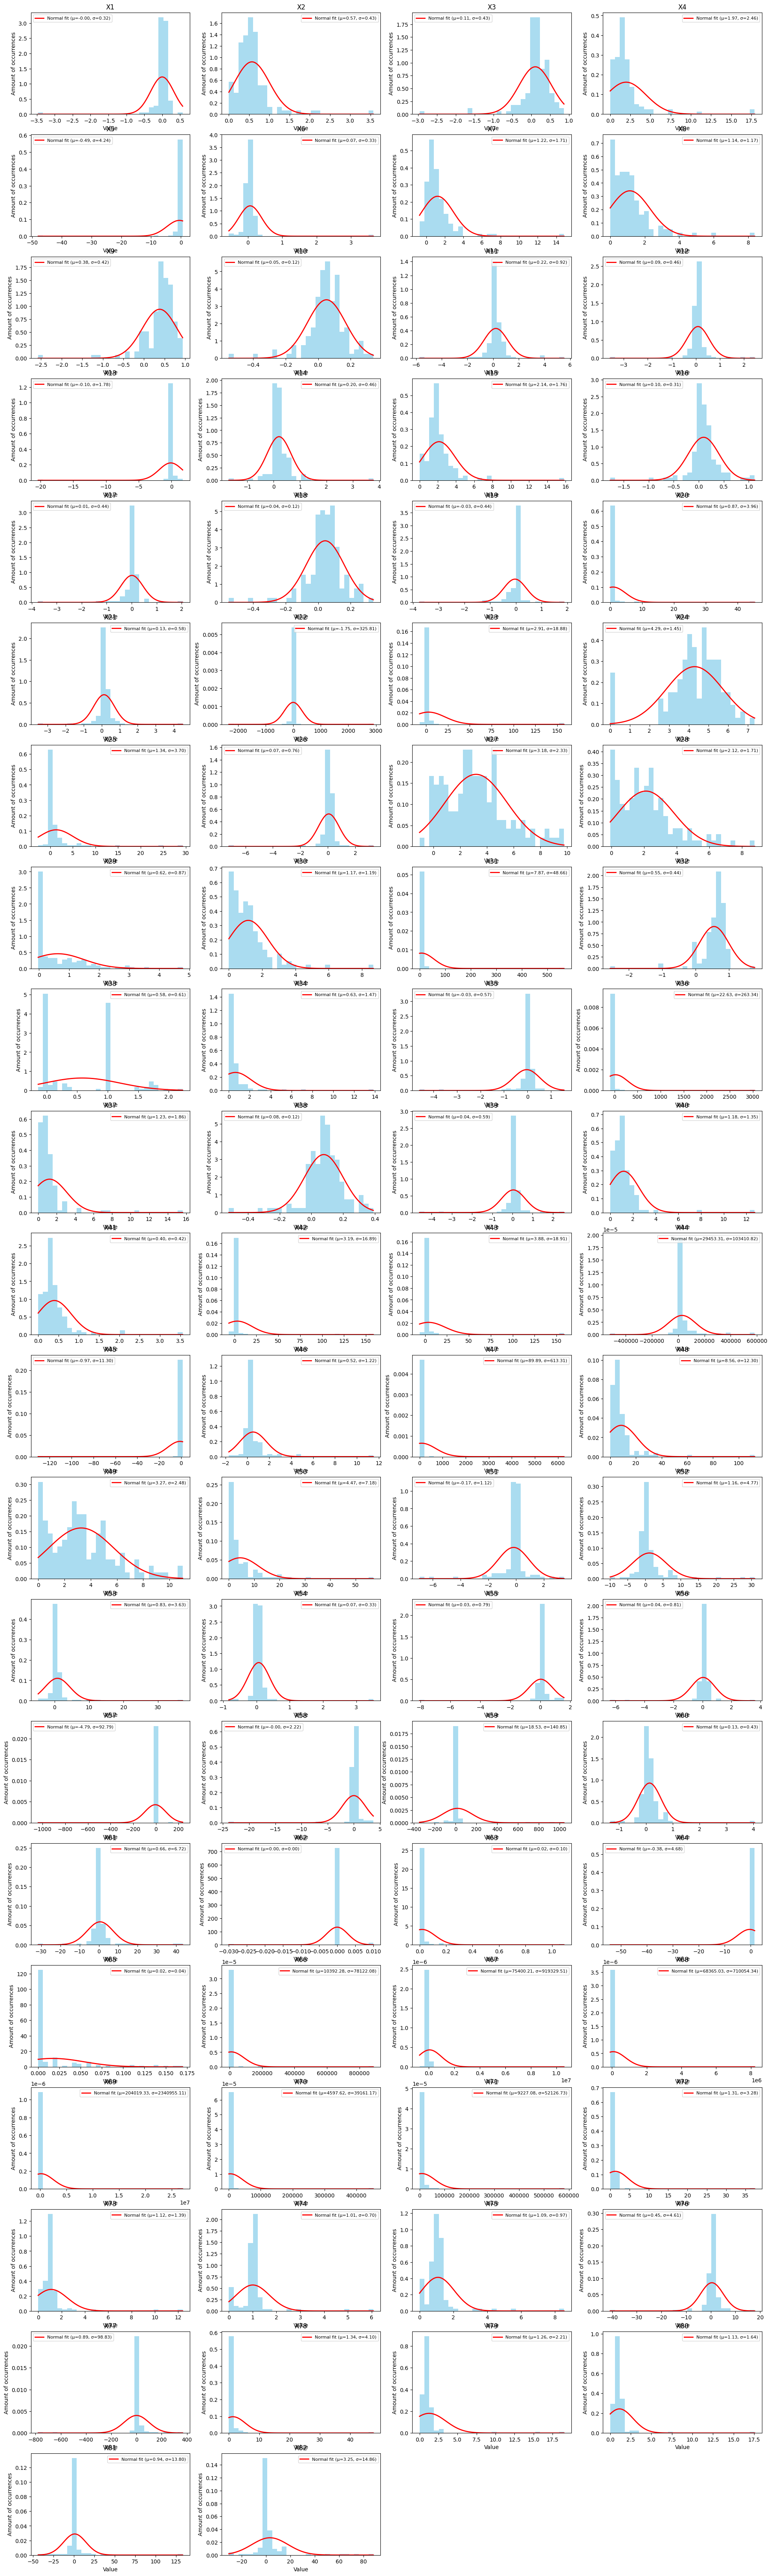

In [12]:
# Get numerical features (exclude target 'S')
training_features = data.drop('S', axis=1).columns

number_of_features = len(training_features)
number_of_columns = 4 # Have more plots per row
number_of_rows = int(np.ceil(number_of_features / number_of_columns))

fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(6*number_of_columns, 4*number_of_rows))
axes = axes.flatten()

for i, column in enumerate(training_features):
    ax = axes[i]

    # Take the column data
    column_data = data[column]

    if len(column_data) == 0:
        ax.set_visible(False)
        continue

    # Histogram
    ax.hist(column_data, bins=30, density=True, alpha=0.7, color='skyblue')

    # Fit normal distribution
    try:
        mu, sigma = stats.norm.fit(column_data)
        x = np.linspace(column_data.min(), column_data.max(), 100)
        y = stats.norm.pdf(x, loc=mu, scale=sigma)
        ax.plot(x, y, 'r-', linewidth=2, label=f'Normal fit (μ={mu:.2f}, σ={sigma:.2f})')
        ax.legend(fontsize=8)
    except:
        pass

    # Titles and labels
    ax.set_title(f'{column}')
    ax.set_xlabel("Value")
    ax.set_ylabel("Amount of occurrences")

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()


Plotting with 133 samples


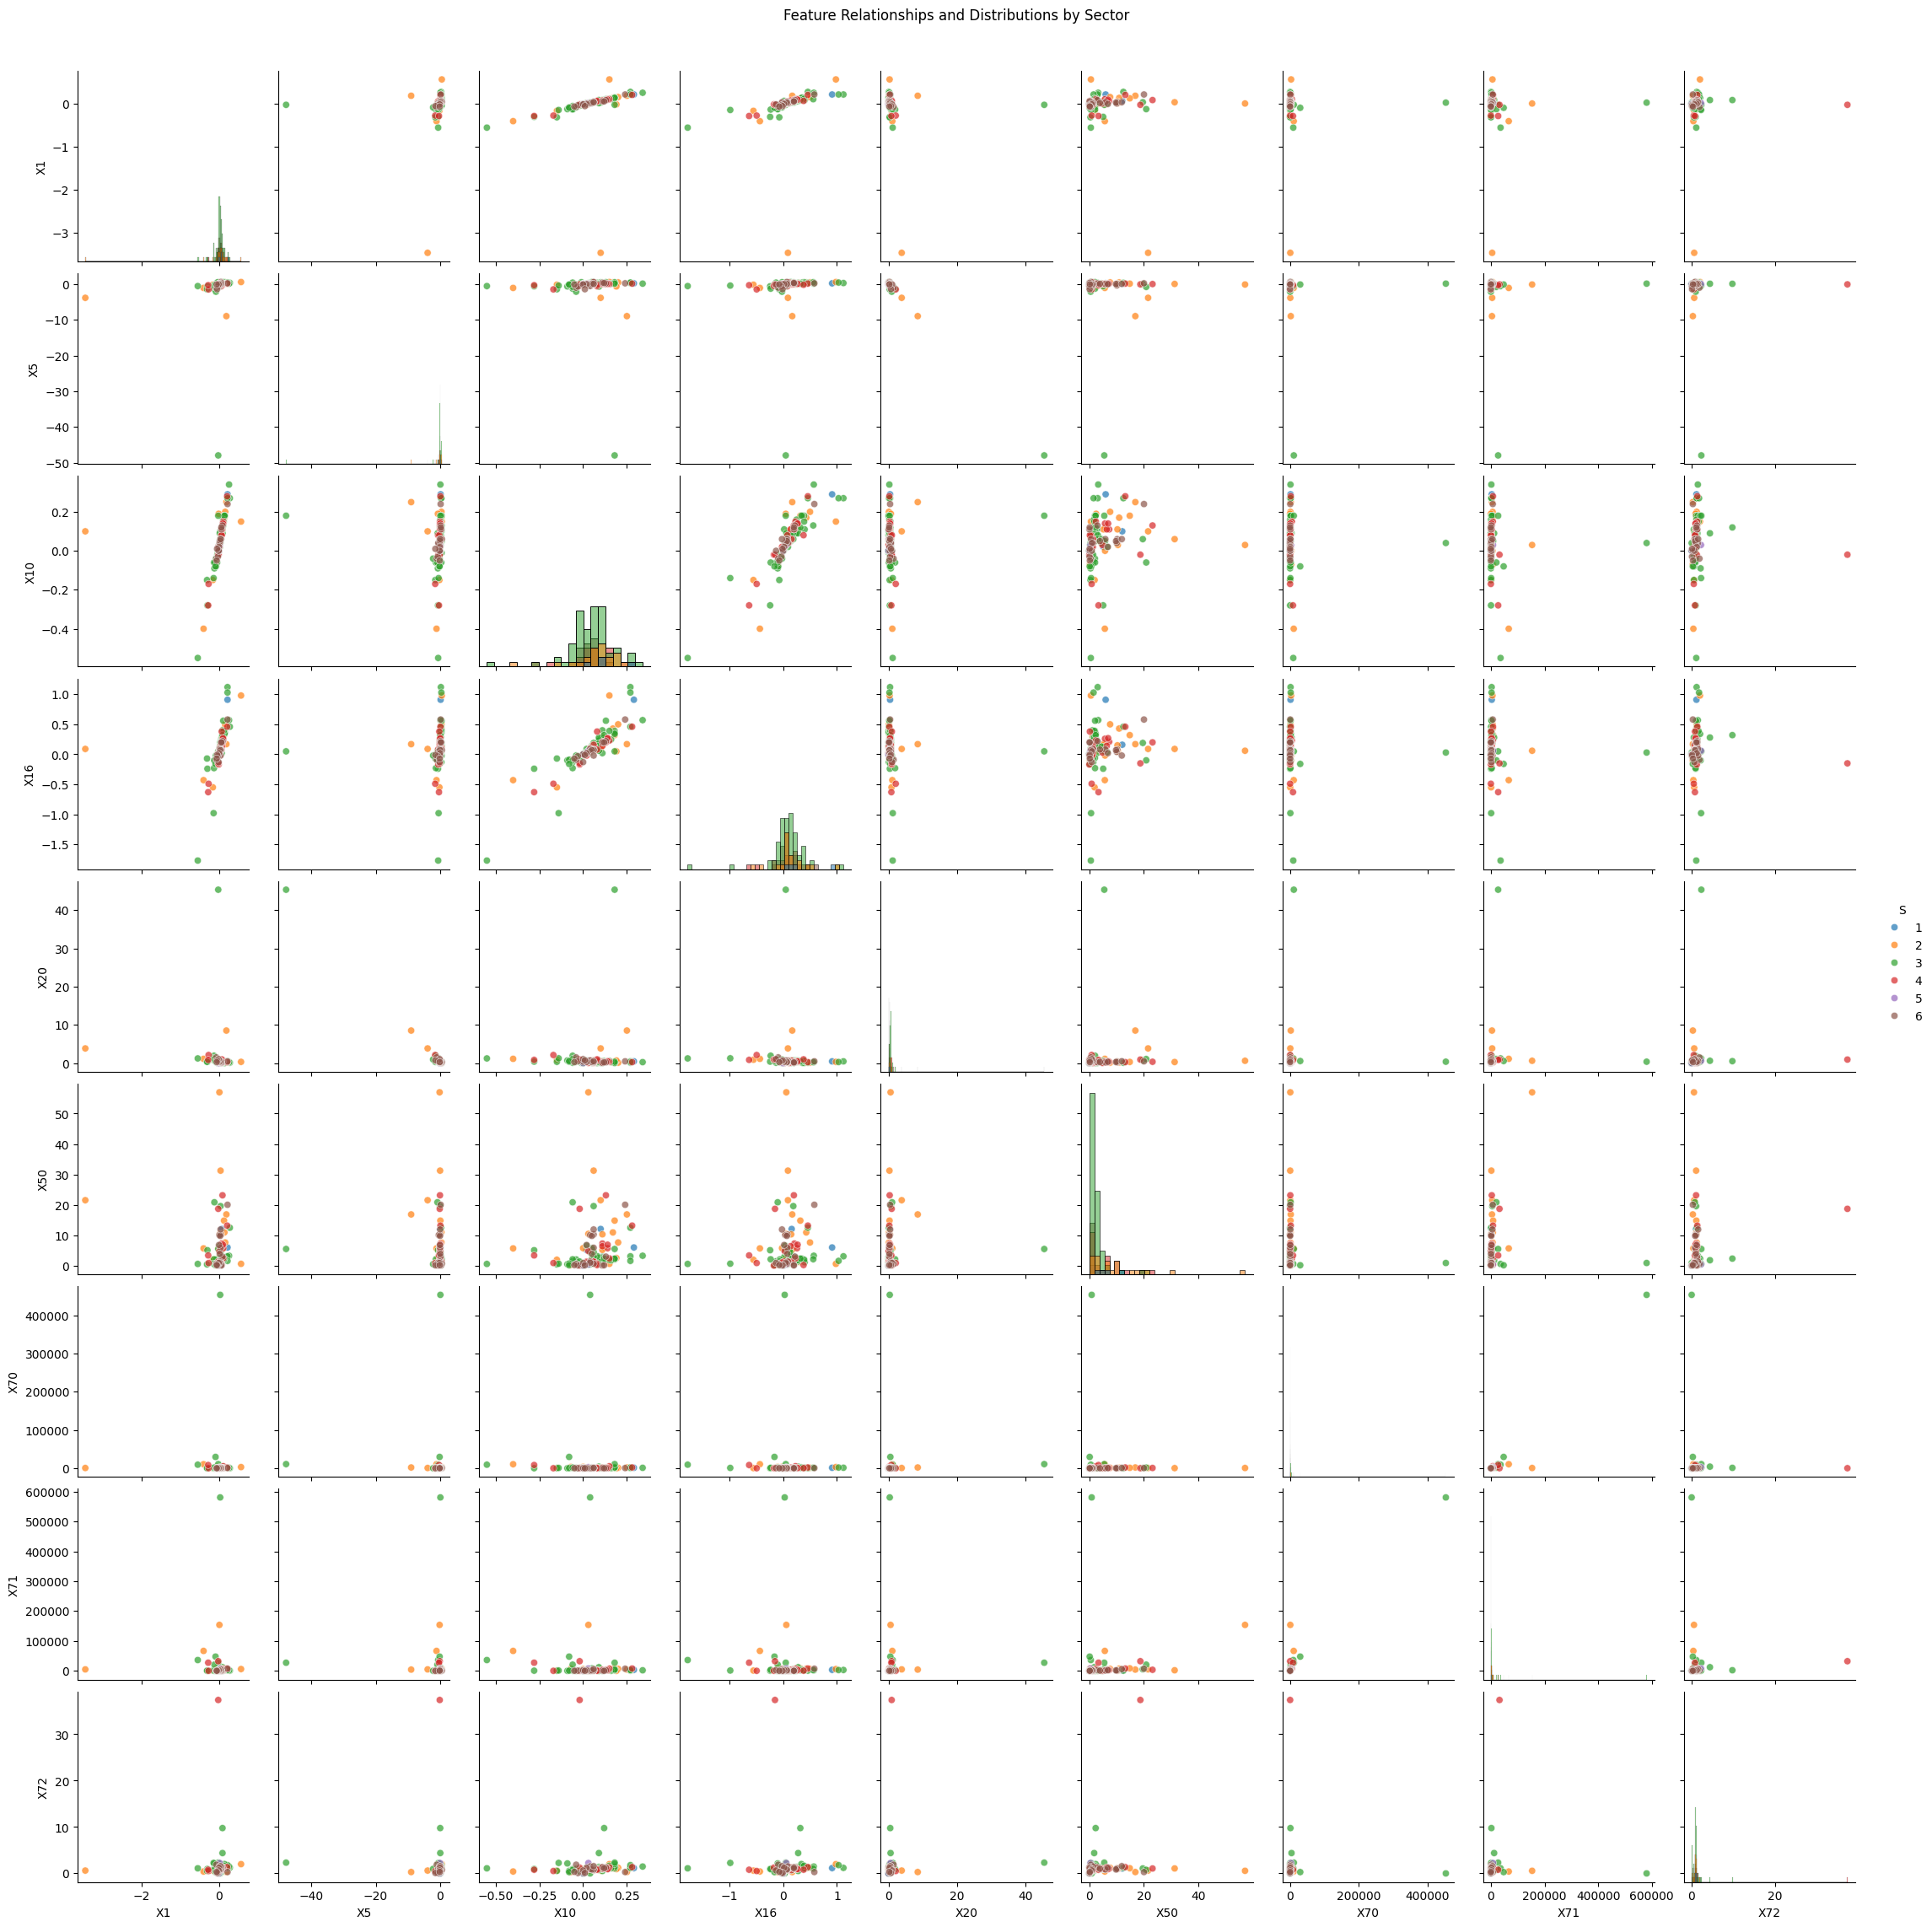

In [13]:
# Use pairplot for simple and elegant visualization of all relationships
# Include both regular features and highly correlated ones for comprehensive view
selected_features = ['X1', 'X5', 'X10', 'X16', 'X20', 'X50', 'X70', 'X71', 'X72', 'S']

print(f"Plotting with {len(data)} samples")

# Single comprehensive pairplot showing all feature relationships + distributions, colored by sector
sns.pairplot(data[selected_features], hue='S', palette='tab10', plot_kws={'alpha': 0.7}, diag_kind='hist')
plt.suptitle("Feature Relationships and Distributions by Sector", y=1.02)
plt.show()

<div style="color: #90EE90">

This paints a way clearer picture, the null values make a lot more sense when considering that in most cases the values can range from negative to positive. This makes it hard to figure out if any of them are missing values. BUt considering how the data follows a normal distrbution in a lot of cases it should be okay to leave like this for now.

While the scatterplot shows that the data looks to be linear for a lot of samples though some of them do have a descent amount of outliers and there's also some extreme outrliers.

## Split data

</div>

In [14]:
# Features and target
X = data.drop('S', axis=1)
y = data['S']


'''
Split
Use stratify to maintain the same class distribution. 
This is needed because of the imbalance in the classes. And to ensure there is a test sample and a trian sample fort sector 3
'''

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42 
)

print("Training class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())


Training class distribution:
 S
3    53
2    17
6    16
4    15
1     3
5     2
Name: count, dtype: int64
Test class distribution:
 S
3    14
2     4
6     4
4     4
1     1
Name: count, dtype: int64


In [15]:
'''
Scale the features, this is needed so the different numvers all function on the same scale. WIthout this high numbers would dominate
the learning process and low numbers would be ignored.
'''

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original data shape: {X_train.shape}")
print(f"Data shape after scaling: {X_train_scaled.shape}")

Original data shape: (106, 82)
Data shape after scaling: (106, 82)


Dimensionality: 82 to 27 features
Explained variance: 95.2%


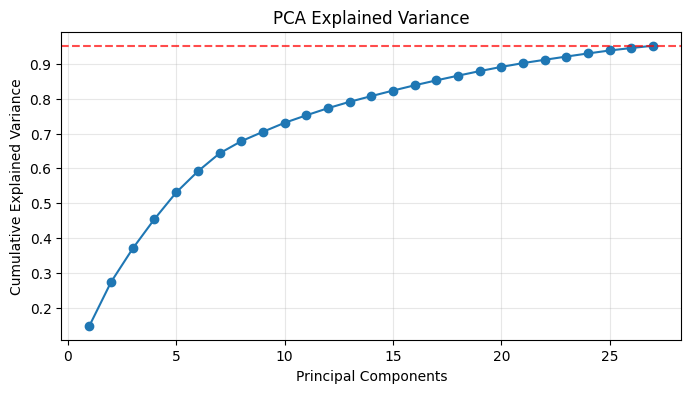

In [16]:
# Apply PCA to capture 95% variance on the scaled data
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Dimensionality: {X_train.shape[1]} to {X_train_pca.shape[1]} features")
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.1%}")

# Plot summed explained variance
cumvar = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(range(1, len(cumvar)+1), cumvar, 'o-')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True, alpha=0.3)
plt.show()


<div style="color: #90EE90">

So with PCA the explained variance is still 95.2 which is excelent. This means the new reduced features still explain the variance in the data very well and remain very useful for learning. But the reduced dimensionality means the re-occuring featuees with high correlations won't dominate the learning process.

- [PCA geeks for feeks](https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/)
- [PCA sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [PCA towards data science](https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e/)

</div>

Original PCA dataset: 106 samples
Samples with outliers (z-score > 2): 47 samples
Percentage of outliers: 44.3%
Note: Outlier analysis on PCA components rather than original features


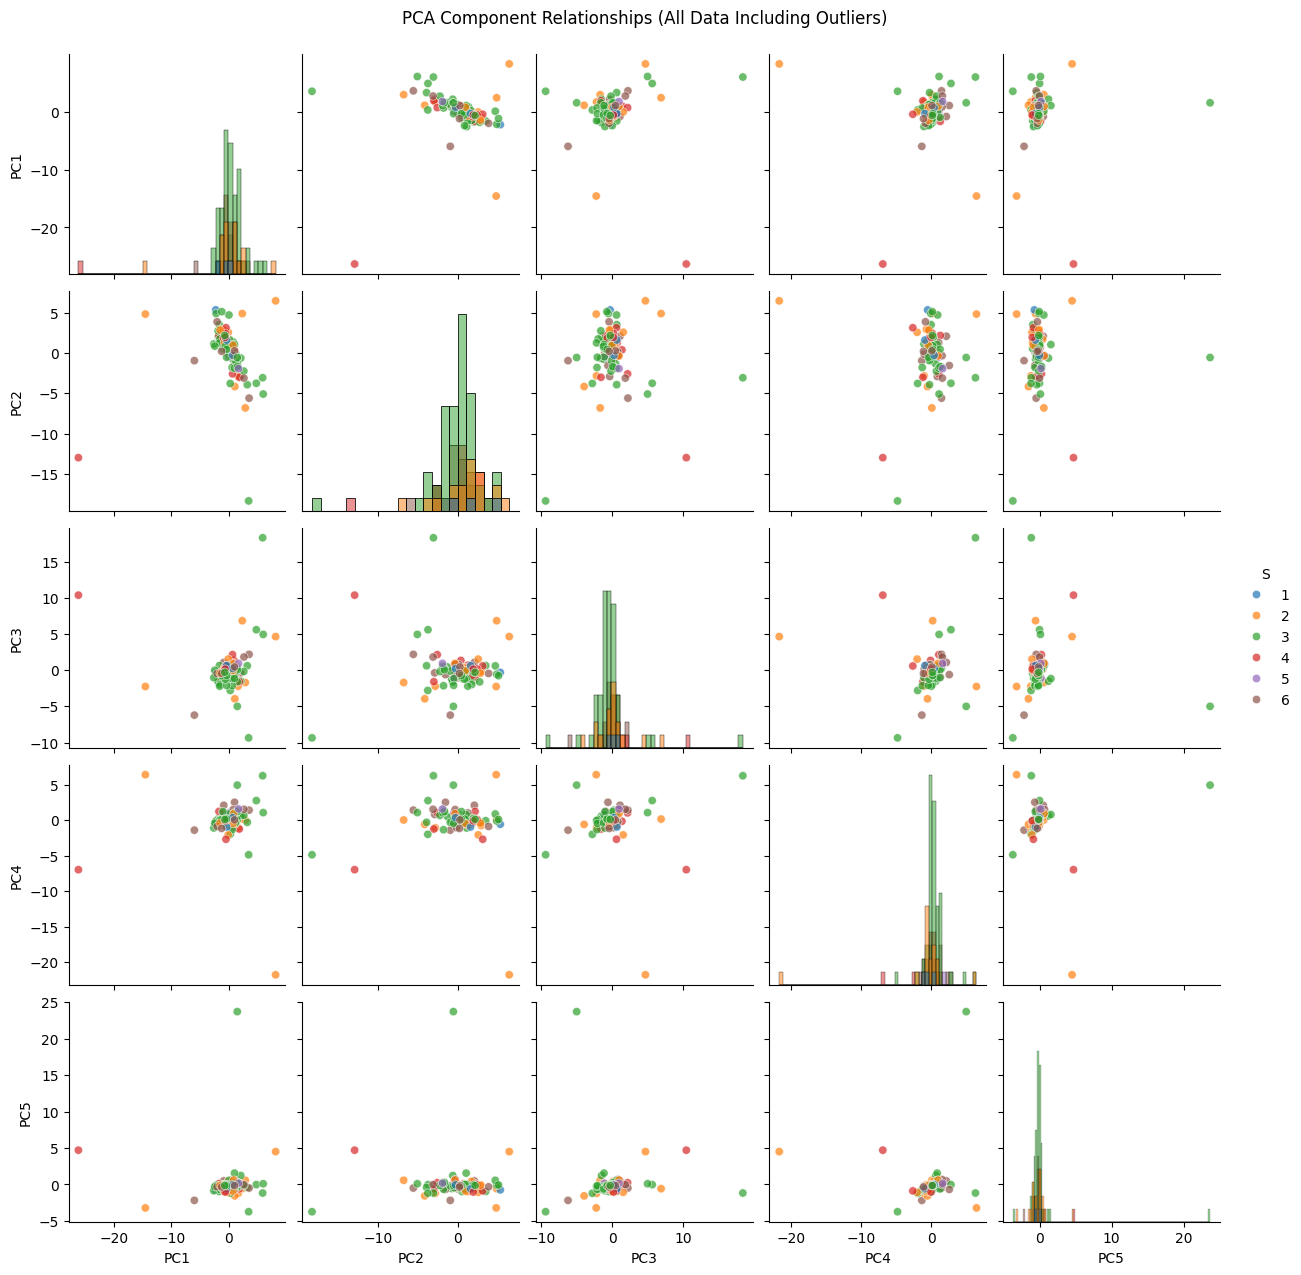

In [17]:
# Calculate z-scores for PCA components
z_scores = np.abs(stats.zscore(X_train_pca))

# Identify outliers (rows where all z-scores are above threshold)
outlier_mask = (z_scores > 2).any(axis=1)
n_outliers = outlier_mask.sum()

print(f"Original PCA dataset: {len(X_train_pca)} samples")
print(f"Samples with outliers (z-score > 2): {n_outliers} samples")
print(f"Percentage of outliers: {(n_outliers / len(X_train_pca)) * 100:.1f}%")
print("Note: Outlier analysis on PCA components rather than original features")

# Create a DataFrame for visualization with first few PCA components (using all data)
n_components_to_plot = min(5, X_train_pca.shape[1])  # Plot first 5 components or all if less
pca_df = pd.DataFrame(X_train_pca[:, :n_components_to_plot], 
                     columns=[f'PC{i+1}' for i in range(n_components_to_plot)])
pca_df['S'] = y_train.values

# Plot PCA components relationships (keeping all data including outliers)
sns.pairplot(pca_df, hue='S', palette='tab10', plot_kws={'alpha':0.7}, diag_kind='hist')
plt.suptitle("PCA Component Relationships (All Data Including Outliers)", y=1.02)
plt.show()

<div style="color: #90EE90">

## Conclusion from analysis

There's serveral things important to consider when preparing the data, choosing my model, performance metric and models to train. The most important considerations are as follow:

- The samples are very imbalanced, with one sector being slightly more than half of all ocurances. While 2 of the sectors barerly have any data which makes it hard to work with.
- There's quite a lot of missing values but there isn't a lot of data to begin with.
- The data has quite a few features with correlations that are very high, X71 for example has 4 other features that it has a correlation of roughly 0.95 with. Meaning that this needs to be dealt with in the data. Or a model has to be used that can use this data without becoming biased to those features.
- The data seems somewhat linear despite the outlier when taking a closer look. 
- The points don't seem very clearly seperated from eachother, especially not with clusters.
- There's not enough data to be able to properly make use of training folds because ther's only 1 sample of sector 5 for train and 1 for test.

</div>

#### Used resources
- [Feature selection](https://neptune.ai/blog/feature-selection-methods)
- [What is Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)
- [Principal component analysis](https://towardsdatascience.com/too-many-features-lets-look-at-principal-component-analysis-62504b791ae9/)

- [Modal selection chart sklearn](https://scikit-learn.org/stable/machine_learning_map.html)
- [Model selection help article 1](https://www.ibm.com/think/topics/model-selection)
- [Model selection help article 2](https://www.devoteam.com/expert-view/a-practical-guide-to-machine-learning-model-selection/)

#### Deel B

Wat zou je als nulmodel kiezen en waarom? Welke prestatiemaat gebruik je om je modellen te beoordelen, waarom? Hoe scoort je nulmodel op deze prestatiemaat?

Houd je antwoord kort en bondig.

<div style="color: #90EE90">

## Reasoning - short

For my dataset the main challenge is the extreme class imbalance. To set a fair baseline I chose the stratified dummy classifier, since it predicts classes in proportion to their frequency. This avoids the misleading performance of majority or uniform baselines that would ignore minority classes. I ruled out the empirical probability baseline because my focus is on hard-label classification, not probability outputs. For evaluation, I selected Macro-F1, since unlike accuracy, micro-F1, or weighted-F1, it treats all classes equally and ensures the minority sectors are properly reflected. This also allows clear inspection through confusion matrices to see where specific sectors are misclassified.

</div>

#### Used resources:

- [Information about dummy classifiers](https://medium.com/@eskandar.sahel/a-dummy-classifier-a-baseline-classifier-or-a-null-model-71df50fd8947)
- [What is log loss](https://www.kaggle.com/code/dansbecker/what-is-log-loss)
- [Performance metrics](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide)
- [Performance metrics 2](https://codefinity.com/blog/How-to-Choose-the-Right-Metric-for-Your-Model)
- [What are ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [Different F1 scores](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html)


Null Model (Stratified) - Macro F1: 0.334

 Class frequencies learned by null model:
  Sector 1: 0.028
  Sector 2: 0.160
  Sector 3: 0.500
  Sector 4: 0.142
  Sector 5: 0.019
  Sector 6: 0.151

Null Model Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.25      0.29         4
           3       0.67      0.71      0.69        14
           4       0.29      0.50      0.36         4
           6       0.50      0.25      0.33         4

    accuracy                           0.52        27
   macro avg       0.36      0.34      0.33        27
weighted avg       0.51      0.52      0.50        27



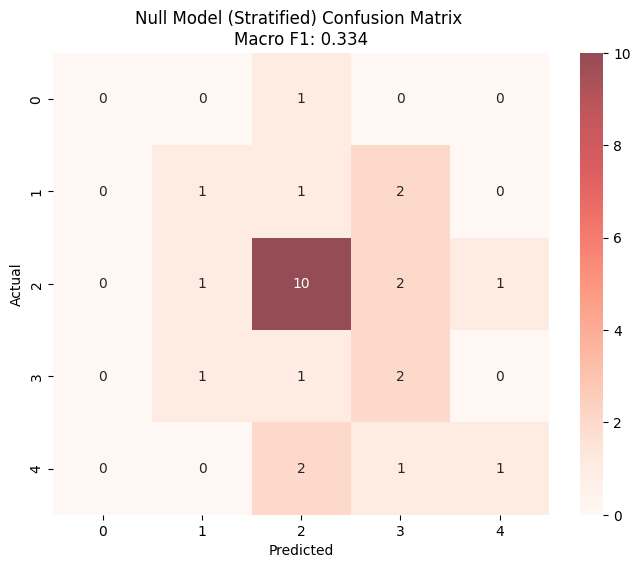

In [18]:
from sklearn.dummy import DummyClassifier

null_model = DummyClassifier(strategy='stratified', random_state=42)
null_model.fit(X_train, y_train)
y_pred_null = null_model.predict(X_test)

null_macro_f1 = f1_score(y_test, y_pred_null, average='macro')

print(f"Null Model (Stratified) - Macro F1: {null_macro_f1:.3f}")

print(f"\n Class frequencies learned by null model:")
for class_label, freq in zip(null_model.classes_, null_model.class_prior_):
    print(f"  Sector {class_label}: {freq:.3f}")

print(f"\nNull Model Classification Report:")
print(classification_report(y_test, y_pred_null, zero_division=0)) # To avoid warnings on zero division

cm_null = confusion_matrix(y_test, y_pred_null)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_null, annot=True, fmt='d', cmap='Reds', alpha=0.7)
plt.title(f'Null Model (Stratified) Confusion Matrix \nMacro F1: {null_macro_f1:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Deel C

Stel, onder andere aan de hand van je antwoorden in deel A en B, een korte lijst van *requirements* op. Waar moet je model minimaal aan voldoen. Licht gemaakte keuzes kort en bondig toe.

<div style="color: #90EE90">

- Handle class imbalance to the best of ability
- Evaluation metric should consider all classes
- Training strategy should try and prevent ignoring small classes
- Try and optimize the usage of the data since there isn't a lot
- Make proper use of the outliers for valuable information
- Should be possible to evaluate per sector to have clear insight in where the errors lie

Because the dataset is small and extremely imbalanced, the model should be optimized to handle this as effectively as possible and use metrics that treat the classes fairly. FOr this reason macro F1 would be suitable. The training approach should try and prevent small classes from being ignored and maximize the learnings available from the small data set. Outliers should not be disregarded without consideration because they could have valuable information especially for a small data set. IN the end the error should be easy to interpret as a total but also per sector to see if the minority sectors achieve any benefit.

</div>

#### Deel D

Kies een model dat je wilt gebruiken. Zie https://scikit-learn.org/stable/supervised_learning.html voor een overzicht van beschikbare modellen in **sklearn**. 

Licht kort toe welk model je hebt gekozen en waarom, welke hyperparameterkeuzes voor dit model van belang zijn, wat geschikte waardes voor deze hyperparameters zijn en/of wat de gebruikelijke methodes zijn om deze parameters te tunen.

**Opmerking:** Het gaat hier voornamelijk om je argumentatie en correct gebruik van technieken, het is niet de bedoeling dat je eindeloos lang door blijft modelleren om het *beste* model te vinden.

<div style="color: #90EE90">

### Chosen model

After looking at all the available models I finally decided on **LogisticRegression**. To come to this conclusion I used various resources like the SKlearn model choice chart and other resources that explained good options for a small data set, with extreme imbalance. LogisticRegression made the most sense to me because it's a simple model that would work well with the linearity of the data, could find some kind of way to still leave place for the small sectors to be detected even if the chance is small. Further more LogisticRegression offers a good chance that the outliers can still fit in somewhere within the predictions.

### Why not another type of model

- The use of trees or random forests would risk ignoring small sectors if no splits happen for the low amount of samples of the under represented sectors.
- The use of a distance based model like KNN or LDA didn't seem suitable either because from looking at the scatter plot the data for the different sectors didn't seem be bundled up very well together to allow for this.
- Like discussed in class the use of an neural network would be unsuitable given the small dataset with high risk of overfitting.

### Hyper parameter choice

Here I will list the hyper params I considered important and why I chose the specific values for them:

- **class_weight** Important because it can be used to help deal with the class imbalance by adjusting the weights proportionally to the class frequency using option **balanced**
- **random_state** Normally important to choose any fixed seed to have reproducability across runs. But for this assignment I won't be trying to test lot's of things to find the best model.
- **solver** This is very important for my model, it chooses the solving algorithm for the classification. It has to be a value that supports multiclass problems according to the documentation **liblinear** is a solid choice for my small dataset.
- **max_iter** The max amount of iterations allow for the solver to converge, this is important and should be high. With the low amount of samples it's important to have enough iterations to allow the model to finish training. For this reason I will set it at **1000**
- **multi_class** Important, but because of the solver it is already set to **auto** which is good.

The other params have little influence, are not suitable or aren't relevant to my problem.

- [Logistic regression hyper params](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

</div>


#### Deel E

Fit je model en bepaal hyperparameterkeuzes.

In [19]:
# Set the params even if already default to make it explicit what is happening
model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', class_weight='balanced') # multi_class='auto'
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Calculate metrics
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Logistic Regression - Macro F1: {macro_f1:.3f}")

Logistic Regression - Macro F1: 0.342


#### Deel F

Beoordeel je model. Bespreek de kwaliteit van je model, en licht gemaakte fouten van het model toe.

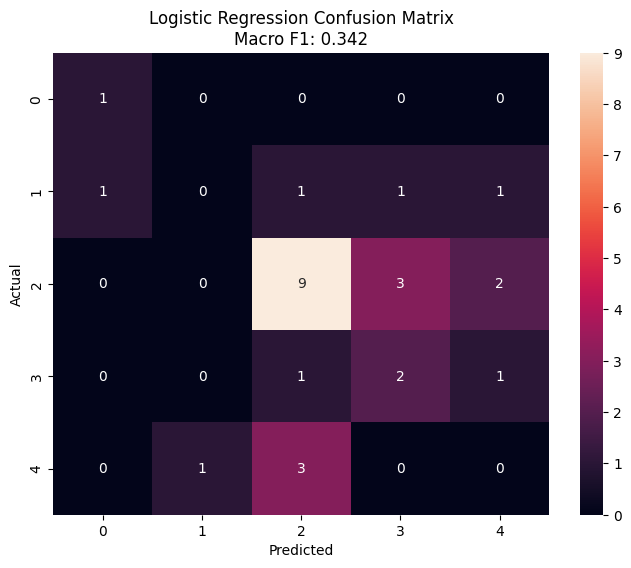

Classification Report:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         4
           3       0.64      0.64      0.64        14
           4       0.33      0.50      0.40         4
           6       0.00      0.00      0.00         4

    accuracy                           0.44        27
   macro avg       0.30      0.43      0.34        27
weighted avg       0.40      0.44      0.42        27



In [20]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Logistic Regression Confusion Matrix\nMacro F1: {macro_f1:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

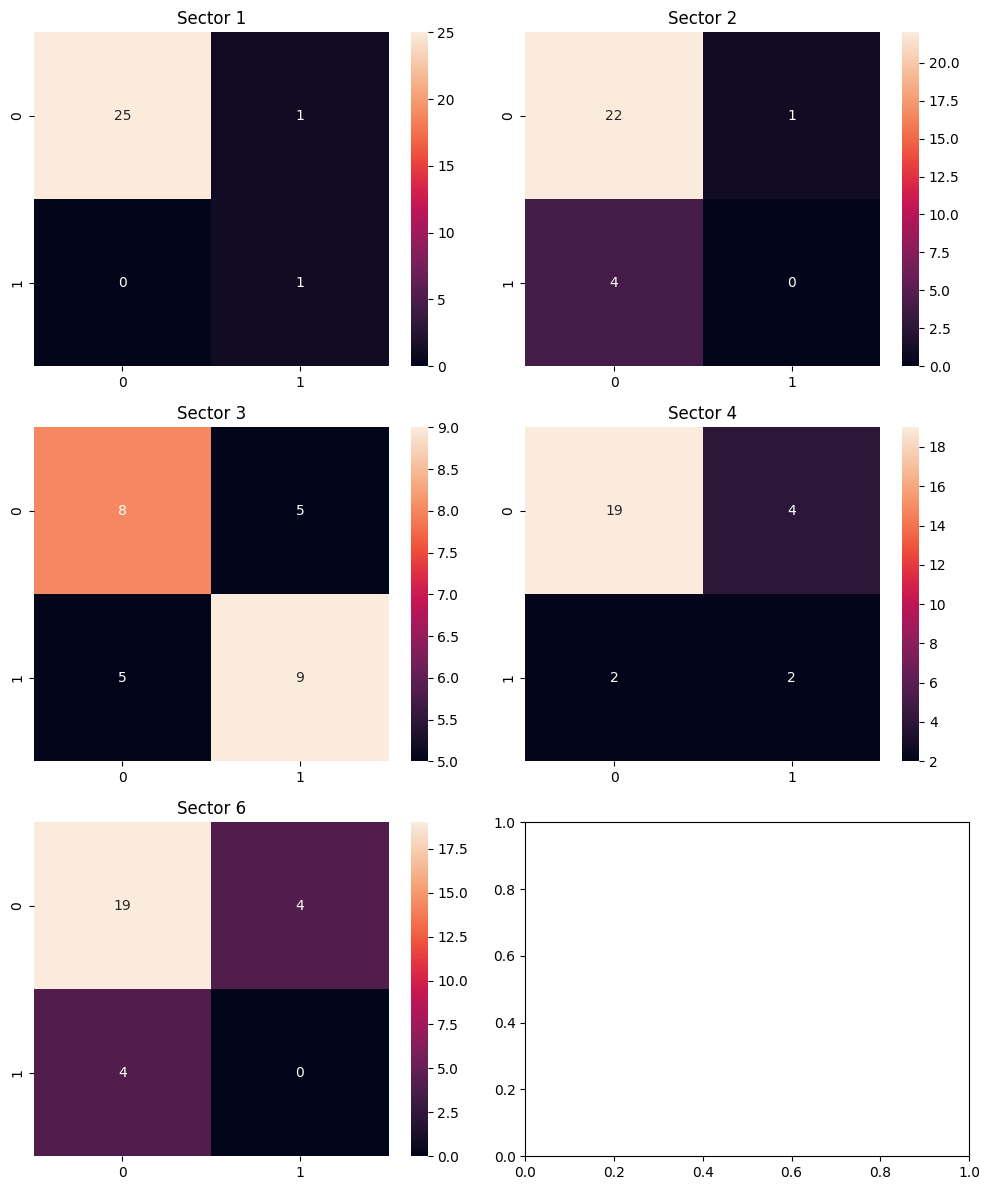

In [21]:
# Binary confusion matrices for sectors with 2 per row so they are bigger and easier to look at
sectors_with_predictions = [s for s in sorted(y_test.unique()) if (y_pred == s).sum() > 0]

number_of_sectors = len(sectors_with_predictions)
number_of_columns = 2
number_of_rows = (number_of_sectors + 1) // 2
fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(10, 4*number_of_rows))
if number_of_sectors == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, sector in enumerate(sectors_with_predictions):
    y_test_binary = (y_test == sector).astype(int)
    y_pred_binary = (y_pred == sector).astype(int)
    cm_binary = confusion_matrix(y_test_binary, y_pred_binary)
    
    sns.heatmap(cm_binary, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'Sector {sector}')

plt.tight_layout()
plt.show()

<div style="color: #90EE90">

# Final findings

Null Model (Stratified) – Macro F1: 0.334
Logistic Regression – Macro F1: 0.342

As expected, the majority sector (especially sector 2) dominates the predictions. Many true samples from sectors 1, 3, and 4 are misclassified as sector 2, suggesting strong overlap with this sector in the feature space. Sector 1 is especially unstable, with its samples scattered across multiple predicted classes, showing the model was unable to learn meaningful patterns for it. Sector 5 received no predictions at all, which is consistent with its extremely small sample size.

Overall, the minority classes are frequently confused with the larger ones, and the overlap between data points prevents the model from distinguishing them effectively. The fact that performance barely improves over the null model (0.342 vs. 0.334) a difference likely due to randomness confirms that the model has little practical value in this context.

One thing that could be explored is oversampling with synthetic data for example with SMOTE. But this probably wouldn't work well since there's not enough samples to be used to create new data points. And since the data points are scattered throughout eachother anyways they might not add much information.

</div>

<div style="color: #90EE90">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Extra notes for self

## Nul model reasoning long

For my data set and purpose the main issue is the class imbalance, I want to choose a nul model suitable and performance metric that will help me evaluate my problem properly and not make it seem like my model is performing properly because it ends up choosing the big sectors and thus seeming like it performs well. While ignoring the small sectors.

For this reason my choice is to use the stratified classifier, it predicts the classes at random but in propotion to their frequency which makes it a fair baseline for my imbalanced set because it would reflect the nature of the data while still considering that the model could have some variance in it's predictions. I chose this over the more uniform models like using majority class which would ignore the minority performance, a uniform model that would ignore frequencies and an empirical probability model which would suit probabilistic metrics but not hard label evaluation.

Using imperical probability could be useful if I cared about the probabilities of the predictions but for my problem it makes more sense to focus on the actual predictions since it's straight forward classification. And the chance of it being a certain sector wouldn't be very interesting.

For the performance metric I want to use Macro-F1. Where as accuracy, or micro F1 would be dominated by the majority classes. The Macro F1 average considers all classes equally ensuring the minority sectors can be considered properly and evaluated and inspected more easily. Weighted F1 would have been an option but would also downplay smaller classes. I also looked at ROC-AUC but after reading the resources those seemed better suited for binary or probablistic evaluations.

Another bonus of the Macro-F1 is that I can use it to make a confusion matrix more easily for each of my 6 sectors. So it's easier to identify if any of the specific sectors is being wrong predicted often, or if one of the sectors is wrongly not predicted.

</div>


sklearn smote

- [SK learn SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- [Class imbalance strats](https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a)
- [Stack exchange unbalanced data](https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he)
- [Google ML concepts imbalanced data sets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [Tensor flow classification with imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)
- [Learning from imbalanced data IEEE paper](https://ieeexplore.ieee.org/document/5128907)
- [Choosing the right estimator SK learn](https://scikit-learn.org/stable/machine_learning_map.html)
- [Imbalanced learn samplers SK Learn](https://imbalanced-learn.org/stable/introduction.html)

